# Latent Dirichlet Allocation (LDA)

<b> Note: This notebook is a compilation of samples I found on the Internet, not my own sentences or my own codes. You can look at the resources I mentioned in the reference section. </b>

Latent Dirichlet allocation (LDA) is a topic model that generates topics based on word frequency from a set of documents. 

This can be thought in terms of clustering, but with a difference. Now, instead of numerical features, we have a collection of words that we want to group together in such a way that each group represents a topic in a document.

There are many ways to do topic modeling, but in this post, we will be discussing a probabilistic modeling approach called Latent Dirichlet Allocation (LDA) developed by Prof. David M. Blei in 2003.

<b> Latent: </b> This refers to everything that we don’t know a priori and are hidden in the data. Here, the themes or topics that document consists of are unknown, but they are believed to be present as the text is generated based on those topics.


<b> Dirichlet: </b> It is a ‘distribution of distributions’. Yes, you read it right. But what does this mean? Let’s think about this with the help of an example. Let’s suppose there is a machine that produces dice and we can control whether the machine will always produce a dice with equal weight to all sides, or will there be any bias for some sides. So, the machine producing dice is a distribution as it is producing dice of different types. Also, we know that the dice itself is a distribution as we get multiple values when we roll a dice. This is what it means to be a distribution of distributions and this is what Dirichlet is. Here, in the context of topic modeling, the Dirichlet is the distribution of topics in documents and distribution of words in the topic. It might not be very clear at this point of time, but it’s fine as we will look at it in more detail in a while.


<b> Allocation: </b> This means that once we have Dirichlet, we will allocate topics to the documents and words of the document to topics.

### How is it works ? (Step by Step)

<p style="color:red";>What LDA says is that each word in each document comes from a topic and the topic is selected from a per-document distribution over topics.</p> 

So we have two matrices:

1. ϴtd = P(t|d) which is the probability distribution of topics in documents


2. Фwt = P(w|t) which is the probability distribution of words in topics


we can say that the probability of a word given document i.e. P(w|d) is equal to

T is the total number of topics

P(w|d) is equal to:

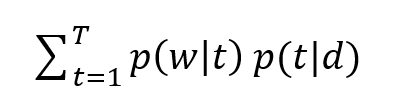



<b> that is the dot product of ϴtd and Фwt for each topic t. </b>

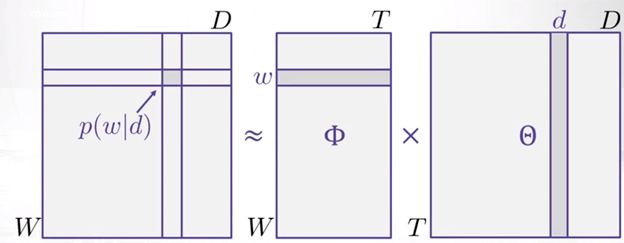

Looking at this we can think of LDA similar to that of <b> matrix factorization</b> or <b> SVD </b>, where we decompose the probability distribution matrix of word in document in two matrices consisting of distribution of topic in a document and distribution of words in a topic.

And to tie back to our example of dice, we can say that each word in the distribution of words in a topic is similar to a side of the dice, and we have Dirichlet parameter to control if all the words have same probability in a topic or will that topic have an extreme bias towards some words. Same intuition is for distribution of topics in a document.

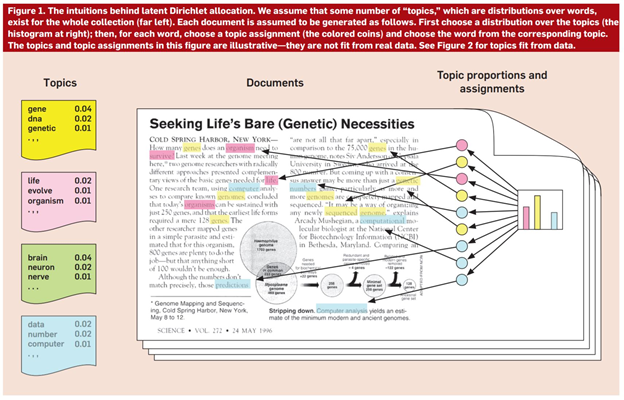

 ### How do we learn the weights of these two matrices

let’s randomly assign weights to both the matrices and assume that our data is generated as per the following steps:

1) Randomly choose a topic from the distribution of topics in a document based on their assigned weights. In the previous example, let’s say we chose <b>pink topic </b>

2) Next, based on the distribution of words for the chosen topic, select a word at random and put it in the document

3) Repeat this step for the entire document

<b> Example : </b> In this process, if our guess of the weights is wrong, then the actual data that we observe will be very unlikely under our assumed weights and data generating process. For example, let’s say we have document D1 which consists of the following text:

<i><i>“Qualcomm® Adreno™ 630 Visual Processing Subsystem featuring room-scale 6DoF with SLAM, Adreno Foveation” </i></i>
    
Let’s say we assign high weights to topic T1 which has high weights for words like Spoon, Plates, Onions etc. then we will see that given our assumption of how data is generated, it is very unlikely that T1 belongs to D1 or these words belongs to T1. Therefore, what <b>we are doing is we are trying to maximize the likelihood of our data given these two matrices. </b>



To identify the correct weights, we will use an algorithm called <b> Gibbs sampling. </b> Let’s now understand what Gibbs sampling is and how does it work in LDA.

## Gibbs Sampling

As I mentioned earlier, to start with, we will assume that we know ϴ and Ф matrices. Now what we will do is, we will slowly change these matrices and get to an answer that maximizes the likelihood of the data that we have.

 We will do this on word by word basis by changing the topic assignment of one word. 
 
 We will assume that we don’t know the topic assignment of the given word but we know the assignment of all other words in the text and we will try to infer what topic will be assigned to this word
 
 

If we look at this in mathematical manner, what we are doing is we are trying to find conditional probability distribution of a single word’s topic assignment conditioned on the rest of the topic assignments.

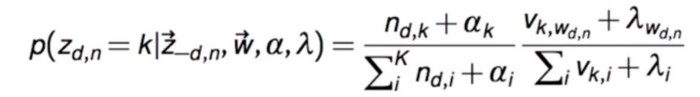

what we will get is a conditional probability equation that looks like this for a single word w in document d that belongs to topic k:

where:

n(d,k): Number of times document d use topic k

v(k,w): Number of times topic k uses the given word

αk: Dirichlet parameter for document to topic distribution

λw: Dirichlet parameter for topic to word distribution

There are two parts two this equation. First part tells us how much each topic is present in a document and the second part tells how much each topic likes a word. v

Note that for each word, we will get a vector of probabilities that will explain how likely this word belongs to each of the topics. In the above equation, it can be seen that the Dirichlet parameters also acts as smoothing parameters when n(d,k) or v(k,w) is zero which means that there will still be some chance that the word will choose a topic going forward.


### Example 

Let’s go through an example now:
To start with, suppose we have a document with some random word topic assignment, for example, as shown below:

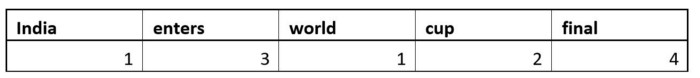

We also have our count matrix v(k,w) as shown below:

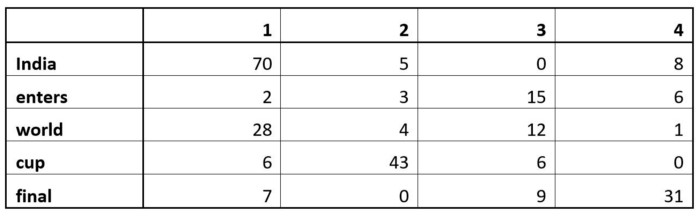

Now let’s change the assignment of word world in the document.

First, we will reduce the count of world in topic 1 from 28 to 27 as we don’t know to what topic world belongs.

Second let’s represent the matrix n(d,k) in the following way to show how much a document use each topic


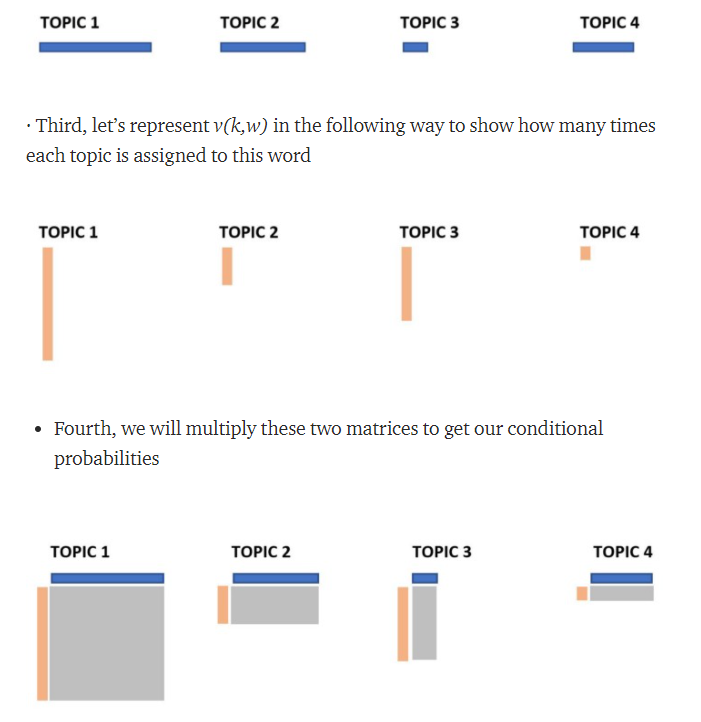


Finally, we will randomly pick any of the topic and will assign that topic to world and we will repeat these steps for all other words as well. Intuitively, topic with highest conditional probability should be selected but as we can see other topics also have some chance to get selected


Although we skipped some details like hyperparameter tuning, but from an intuition perspective, this is how Gibbs sampling works for topic modeling.



In [1]:
!pip install nltk

You should consider upgrading via the 'c:\users\orhun\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
!pip install stop_words

You should consider upgrading via the 'c:\users\orhun\anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install gensim

You should consider upgrading via the 'c:\users\orhun\anaconda3\python.exe -m pip install --upgrade pip' command.


In [4]:
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."

# compile sample documents into a list
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]

In [5]:
doc_set[0]

'Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother.'

### Data Cleaning Steps

<b>1) Tokenizing:</b> converting a document to its atomic elements. #(Bütün bir yazıyı oluşturan her bir sözcüğü ayırma işlemidir.)

<b>2) Stopping:</b> removing meaningless words.

<b>3) Stemming:</b> merging words that are equivalent in meaning.

#### 1) Tokenizing

In [6]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

#This example calls tokenize() on a single document. 
#You’ll need to create a for loop to traverse all your documents. 
#Check the script at the end of this page for an example.

In [7]:
raw = doc_a.lower()
tokens = tokenizer.tokenize(raw)

In [8]:
print(tokens)
#Our document from doc_a is now a list of tokens.

['brocolli', 'is', 'good', 'to', 'eat', 'my', 'brother', 'likes', 'to', 'eat', 'good', 'brocolli', 'but', 'not', 'my', 'mother']


#### 2) Stop Words

Certain parts of English speech, like conjunctions (“for”, “or”) or the word “the” are meaningless to a topic model. These terms are called stop words and need to be removed from our token list.

In [9]:
from stop_words import get_stop_words

# create English stop words list
en_stop = get_stop_words('en')

In [10]:
# remove stop words from tokens
stopped_tokens = [i for i in tokens if not i in en_stop]

print(stopped_tokens)


['brocolli', 'good', 'eat', 'brother', 'likes', 'eat', 'good', 'brocolli', 'mother']


#### 3) Stemming

Stemming words is another common NLP technique to reduce topically similar words to their root. For example, “stemming,” “stemmer,” “stemmed,” all have similar meanings; stemming reduces those terms to “stem.” This is important for topic modeling, which would otherwise view those terms as separate entities and reduce their importance in the model.

In [11]:
from nltk.stem.porter import PorterStemmer

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()

<b> Note: In our example, not much happened: likes became like. </b>

In [12]:
# stem token
texts = [p_stemmer.stem(i) for i in stopped_tokens]

print(texts)


['brocolli', 'good', 'eat', 'brother', 'like', 'eat', 'good', 'brocolli', 'mother']


### Constructing a document-term matrix

To generate an LDA model, we need to understand how frequently each term occurs within each document. To do that, we need to construct a document-term matrix with a package called gensim:

In [15]:
from gensim import corpora, models

texts = []

for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    

The Dictionary() function traverses texts, assigning a unique integer id to each unique token while also collecting word counts and relevant statistics. To see each token’s unique integer id, try print(dictionary.token2id)

In [16]:
print(dictionary.token2id)

{'brocolli': 0, 'brother': 1, 'eat': 2, 'good': 3, 'like': 4, 'mother': 5, 'around': 6, 'basebal': 7, 'drive': 8, 'lot': 9, 'practic': 10, 'spend': 11, 'time': 12, 'blood': 13, 'caus': 14, 'expert': 15, 'health': 16, 'increas': 17, 'may': 18, 'pressur': 19, 'suggest': 20, 'tension': 21, 'better': 22, 'feel': 23, 'never': 24, 'often': 25, 'perform': 26, 'school': 27, 'seem': 28, 'well': 29, 'profession': 30, 'say': 31}


Next, our dictionary must be converted into a bag-of-words:

In [17]:
corpus = [dictionary.doc2bow(text) for text in texts]

The doc2bow() function converts dictionary into a bag-of-words. The result, corpus, is a list of vectors equal to the number of documents. In each document vector is a series of tuples. As an example, print(corpus[0]) results in the following:

In [21]:
print(corpus[0])
print(corpus[1])
print(corpus[2])
print(corpus[3])
print(corpus[4])


[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1)]
[(1, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)]
[(8, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)]
[(1, 1), (5, 1), (8, 1), (19, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]
[(0, 1), (3, 1), (16, 2), (30, 1), (31, 1)]


This list of tuples represents our first document, doc_a. The tuples are (term ID, term frequency) pairs, so if print(dictionary.token2id) says brocolli’s id is 0, then the first tuple indicates that brocolli appeared twice in doc_a. doc2bow() only includes terms that actually occur: terms that do not occur in a document will not appear in that document’s vector.

corpus is a document-term matrix and now we’re ready to generate an LDA model:

In [23]:
import gensim
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=3, id2word = dictionary, passes=20)

The LdaModel class is described in detail in the gensim documentation. Parameters used in our example:

Parameters:

num_topics: required. An LDA model requires the user to determine how many topics should be generated. Our document set is small, so we’re only asking for three topics.

id2word: required. The LdaModel class requires our previous dictionary to map ids to strings.

passes: optional. The number of laps the model will take through corpus. The greater the number of passes, the more accurate the model will be. A lot of passes can be slow on a very large corpus.

In [25]:
print(ldamodel.print_topics(num_topics=3, num_words=3))

[(0, '0.061*"good" + 0.061*"brocolli" + 0.060*"drive"'), (1, '0.031*"good" + 0.031*"brocolli" + 0.031*"health"'), (2, '0.082*"health" + 0.047*"pressur" + 0.047*"brother"')]


What does this mean? Each generated topic is separated by a comma. Within each topic are the three most probable words to appear in that topic. Even though our document set is small the model is reasonable. Some things to think about: - good, brocolli and health make sense together. - The third topic is confusing. 

Note: If we revisit the original documents, we see that drive has multiple meanings: driving a car and driving oneself to improve. This is something to note in our results. - The third topic includes mother and brother, which is reasonable.

Adjusting the model’s number of topics and passes is important to getting a good result. Two topics seems like a better fit for our documents:

LDA assumes documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution, like the ones in our walkthrough model. In other words, LDA assumes a document is made from the following steps:

Determine the number of words in a document. Let’s say our document has 6 words.
Determine the mixture of topics in that document. For example, the document might contain 1/2 the topic “health” and 1/2 the topic “vegetables.”
Using each topic’s multinomial distribution, output words to fill the document’s word slots. In our example, the “health” topic is 1/2 our document, or 3 words. The “health” topic might have the word “diet” at 20% probability or “exercise” at 15%, so it will fill the document word slots based on those probabilities.

## Full Final Code

In [27]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
# create sample documents
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health." 

# compile sample documents into a list
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e]

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)

In [28]:
print(ldamodel.print_topics(num_topics=2, num_words=4))

[(0, '0.112*"brocolli" + 0.112*"good" + 0.082*"health" + 0.080*"eat"'), (1, '0.075*"drive" + 0.053*"mother" + 0.053*"brother" + 0.053*"pressur"')]


In [29]:
print(ldamodel.print_topic(0, topn=5))

0.112*"brocolli" + 0.112*"good" + 0.082*"health" + 0.080*"eat" + 0.048*"brother"


In [30]:
print(ldamodel.print_topic(1, topn=5))

0.075*"drive" + 0.053*"mother" + 0.053*"brother" + 0.053*"pressur" + 0.032*"well"


#### References

1) https://medium.com/@busragokmen67/latent-dirichlet-allocation-lda-kullanarak-nas%C4%B1l-topic-modeling-yap%C4%B1l%C4%B1r-75fe8dddcdd2

2) https://rstudio-pubs-static.s3.amazonaws.com/79360_850b2a69980c4488b1db95987a24867a.html

3) https://radimrehurek.com/gensim/models/ldamodel.html

4) https://ai.stanford.edu/~ang/papers/jair03-lda.pdf

5) https://medium.com/analytics-vidhya/topic-modeling-using-lda-and-gibbs-sampling-explained-49d49b3d1045

6) http://www.cs.columbia.edu/~blei/papers/Blei2012.pdf